In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.5)
colors = sns.color_palette("deep", 4)

In [43]:
# Define a color palette with easily distinguishable colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

def extract_data(method_results, key):
    return np.array([run[key][:30] for run in method_results if key in run and len(run[key]) >= 30])

def plot_trend(ax, data, method_name, color, metric):
    epochs = range(1, 31)  # First 30 epochs
    mean = np.mean(data, axis=0)
    error = sem(data, axis=0)
    
    ax.plot(epochs, mean, color=color, linewidth=2, label=method_name)
    ax.fill_between(epochs, mean - error, mean + error, color=color, alpha=0.3)

def create_plot(results, metric='train_NLL', log_scale=True):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create a mapping of method names to colors
    method_names = list(results.keys())
    color_map = dict(zip(method_names, colors[:len(method_names)]))
    
    for method_name, method_results in results.items():
        data = extract_data(method_results, metric)
        plot_trend(ax, data, method_name, color_map[method_name], metric)
    
    # Update y-axis label
    if metric == 'val_NLL':
        y_label = 'Validation NLL'
    elif metric == 'val_MSE':
        y_label = 'Validation MSE'
    else:
        y_label = metric.replace('_', ' ').title()
    
    # ax.set_title(f'{y_label} Across Different Methods (First 30 Epochs)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Epochs', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.legend(fontsize=10, loc='best')
    ax.set_xlim(1, 30)
    
    if log_scale:
        ax.set_yscale('log')
        ax.set_ylabel(f'{y_label} (log scale)', fontsize=12)
    
    ax.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    plt.savefig(f'{metric}_comparison_30epochs_{"log" if log_scale else "linear"}.png', dpi=300, bbox_inches='tight')
    plt.show()


In [44]:
results = {
    'SGD_ensembles': [
        {'MSE': 0.5972450971603394, 'RMSE': 0.7728163599967957, 'NLL': 0.39670300483703613, 'train_NLL': [786.96167, 0.752757, 0.495731, 0.711324, 0.653156, 0.995039, 0.665581, 0.67477, 0.655104, 0.972668, 0.659985, 0.596886, 0.753616, 0.74064, 0.571775, 0.679375, 0.512468, 0.516622, 0.518543, 0.463763, 0.461099, 0.456244, 0.481681, 0.479751, 0.497704, 0.417063, 0.384792, 0.419637, 0.370294, 0.511132, 0.358147, 0.774371, 0.407514, 0.506146, 0.38207, 0.388485, 0.414917, 0.460051, 0.439406, 0.390119, 0.574695, 0.559516, 0.462572, 0.431689, 0.603307, 0.594964, 0.490895, 0,0,0,0], 'train_MSE': [32.233059, 1.039066, 0.875269, 0.853162, 0.857269, 0.824377, 0.863843, 0.982362, 0.790505, 1.074241, 0.890409, 0.705726, 0.72647, 0.852623, 0.681005, 1.00203, 0.616167, 0.698776, 0.593081, 0.564892, 0.612563, 0.621601, 0.542414, 0.577699, 0.680433, 0.54689, 0.565253, 0.586823, 0.53055, 0.612587, 0.538413, 0.769485, 0.619089, 0.612024, 0.552554, 0.548466, 0.580636, 0.598685, 0.638979, 0.574325, 0.658636, 0.609221, 0.576074, 0.67413, 0.593697, 0.622361, 0.583426, 0,0,0,0], 'val_NLL': [806.343384, 0.811197, 0.465044, 0.695846, 0.640367, 0.993255, 0.65085, 0.69047, 0.65966, 0.962818, 0.693025, 0.624255, 0.745961, 0.740637, 0.564898, 0.696191, 0.527834, 0.527511, 0.552595, 0.483155, 0.493887, 0.509656, 0.457808, 0.488312, 0.520018, 0.444764, 0.426917, 0.472885, 0.42991, 0.503363, 0.430162, 0.824844, 0.456157, 0.573895, 0.409475, 0.479578, 0.456078, 0.520781, 0.506425, 0.431984, 0.587782, 0.716619, 0.513696, 0.539481, 0.582873, 0.669509, 0.729766, 0,0,0,0], 'val_MSE': [31.791256, 1.021071, 0.785453, 0.845373, 0.830416, 0.973996, 0.95271, 0.99211, 0.864164, 1.031702, 0.973304, 0.744787, 0.780321, 0.881209, 0.703707, 0.988564, 0.588612, 0.640318, 0.645115, 0.604599, 0.605917, 0.678904, 0.548521, 0.603518, 0.659483, 0.553993, 0.641952, 0.596485, 0.544894, 0.625015, 0.593242, 0.906448, 0.66766, 0.701715, 0.608823, 0.654511, 0.599911, 0.664219, 0.704999, 0.607812, 0.702393, 0.666907, 0.618225, 0.671008, 0.628058, 0.752647, 0.589599, 0,0,0,0]},
        {'MSE': 0.5592621564865112, 'RMSE': 0.7478383183479309, 'NLL': 0.4612855315208435, 'train_NLL': [899.560303, 0.475342, 0.888523, 1.046219, 0.666561, 0.628486, 0.916745, 0.8327, 0.641761, 0.675311, 0.58617, 0.67275, 0.614266, 0.604807, 0.606434, 0.709576, 0.577348, 0.479447, 0.607572, 0.641011, 0.458421, 0.465399, 0.527811, 0.597655, 0.430467, 0.622496, 0.46992, 0.404269, 0.443057, 0.425648, 0.386036, 0.519964, 0.376211, 0.528376, 0.380571, 0.432591, 0.367225, 0.409534, 0.412499, 0.413507, 0.356013, 0.402771, 0,0,0,0,0,0,0,0,0], 'train_MSE': [32.327091, 0.946833, 3.069053, 3.173867, 0.917644, 0.909333, 1.815418, 1.290375, 0.710358, 0.789256, 0.828406, 0.822692, 0.788589, 0.695138, 0.678701, 0.973862, 0.688133, 0.574703, 0.640087, 0.736111, 0.575158, 0.562959, 0.612387, 0.65309, 0.560436, 0.528909, 0.526317, 0.619185, 0.550466, 0.537465, 0.547413, 0.68096, 0.49247, 0.603566, 0.553328, 0.576834, 0.612046, 0.606868, 0.615926, 0.647271, 0.551039, 0.591017,0,0,0,0,0,0,0,0,0], 'val_NLL': [913.501343, 0.647476, 0.950695, 1.069236, 0.728328, 0.666182, 0.988276, 0.86137, 0.697305, 0.732427, 0.657739, 0.738037, 0.657341, 0.664523, 0.682651, 0.77393, 0.605821, 0.506806, 0.62519, 0.710251, 0.505245, 0.504645, 0.571702, 0.632407, 0.499293, 0.673661, 0.552892, 0.499582, 0.509989, 0.477583, 0.430993, 0.593282, 0.428893, 0.562173, 0.475441, 0.485792, 0.417847, 0.482392, 0.440177, 0.526487, 0.456415, 0.43911, 0,0,0,0,0,0,0,0,0], 'val_MSE': [32.507046, 1.009859, 3.234557, 2.910276, 0.934881, 0.912063, 1.915106, 1.281276, 0.781207, 0.935448, 1.007877, 0.898425, 0.803933, 0.759512, 0.764712, 1.110492, 0.718125, 0.611238, 0.658913, 0.849342, 0.621304, 0.651493, 0.648106, 0.625025, 0.619502, 0.587241, 0.602342, 0.620316, 0.586036, 0.591719, 0.546112, 0.70897, 0.525816, 0.638537, 0.672343, 0.643875, 0.547849, 0.662297, 0.627056, 0.601109, 0.631452, 0.596876, 0,0,0,0,0,0,0,0,0]},
        {'MSE': 0.592961311340332, 'RMSE': 0.7700397968292236, 'NLL': 0.4337102472782135, 'train_NLL': [1306.630615, 0.717841, 0.995037, 0.737786, 0.710908, 1.395535, 0.650367, 0.700092, 0.923642, 0.683302, 0.675591, 0.679883, 0.575607, 0.61776, 0.571856, 0.531914, 0.506923, 0.575727, 0.523784, 0.618766, 0.555334, 0.460698, 0.440796, 0.450305, 0.454039, 0.399433, 0.434655, 0.435422, 0.406484, 0.482784, 0.383996, 0.560456, 0.389145, 0.431125, 0.438547, 0.425287, 0.403099, 0.484327, 0.42171, 0.535409, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'train_MSE': [32.637165, 0.960854, 2.295407, 0.756991, 1.138212, 6.437693, 0.857043, 0.828982, 0.787209, 0.881251, 0.72664, 0.695312, 0.604512, 0.664095, 0.707139, 0.611315, 0.628124, 0.646967, 0.65282, 0.713956, 0.573839, 0.562366, 0.526439, 0.569305, 0.567322, 0.526285, 0.664715, 0.65027, 0.613767, 0.610206, 0.517919, 0.701955, 0.570838, 0.629497, 0.597613, 0.562974, 0.559825, 0.56529, 0.552833, 0.755388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'val_NLL': [1281.329346, 0.643139, 0.976448, 0.76752, 0.742784, 1.452569, 0.684774, 0.765452, 1.000778, 0.734218, 0.725573, 0.734246, 0.63742, 0.684489, 0.658222, 0.611028, 0.585614, 0.647198, 0.585767, 0.699314, 0.620998, 0.523122, 0.518543, 0.493828, 0.530373, 0.468742, 0.506475, 0.521825, 0.455918, 0.547756, 0.466415, 0.639148, 0.459438, 0.494029, 0.511207, 0.469545, 0.429245, 0.530446, 0.450569, 0.603638, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'val_MSE': [31.890142, 1.083941, 2.199593, 0.856314, 1.494283, 6.932792, 1.047903, 0.959181, 1.07513, 0.940931, 0.840242, 0.995984, 0.854761, 0.882447, 0.8231, 0.885001, 1.009997, 0.957034, 0.81442, 0.69979, 0.643895, 0.837763, 0.639359, 0.668679, 0.887423, 0.717737, 0.678815, 0.863995, 0.689447, 0.636757, 0.652918, 0.871151, 0.787779, 0.764952, 0.622391, 0.692632, 0.586206, 0.633044, 0.632509, 1.054691, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
        {'MSE': 0.5123024582862854, 'RMSE': 0.7157530784606934, 'NLL': 0.3895551562309265, 'train_NLL': [918.094238, 0.569736, 0.524983, 1.157019, 0.584134, 0.545788, 0.749161, 0.65307, 0.598869, 0.647675, 0.735326, 0.699179, 0.82013, 0.609378, 0.566632, 0.778054, 0.620943, 0.710441, 0.596619, 0.506868, 0.492936, 0.45104, 0.795977, 0.566363, 0.548474, 0.507177, 0.473501, 0.521484, 0.587815, 0.468862, 0.42244, 0.432907, 0.461285, 0.356278, 0.348833, 0.389545, 0.38093, 0.423828, 0.451374, 0.422453, 0.437734, 0.46465, 0.45782, 0.439775, 0.608134, 0.594284, 0.67089, 0.69204, 0.673745, 0, 0], 'train_MSE': [32.536716, 1.02018, 0.808606, 1.014911, 0.88486, 0.699739, 1.203443, 0.896024, 0.841049, 0.788946, 0.897271, 0.918879, 1.032183, 0.651391, 0.65952, 1.274064, 0.728774, 0.710651, 0.78601, 0.607552, 0.696069, 0.494508, 1.26826, 0.665077, 0.644416, 0.630785, 0.616033, 0.760084, 0.621503, 0.668138, 0.510936, 0.567198, 0.590934, 0.537838, 0.533829, 0.592242, 0.569047, 0.576827, 0.563405, 0.62715, 0.572106, 0.654296, 0.586913, 0.590853, 0.699734, 0.627178, 0.588961, 0.657147, 0.685707, 0, 0], 'val_NLL': [944.224121, 0.600921, 0.537588, 1.152114, 0.640228, 0.556414, 0.773292, 0.660179, 0.606044, 0.64254, 0.740696, 0.746235, 0.865339, 0.626932, 0.585065, 0.856416, 0.657379, 0.729831, 0.693444, 0.550213, 0.490945, 0.463882, 0.827436, 0.578783, 0.564139, 0.530743, 0.511328, 0.536291, 0.612129, 0.518213, 0.41916, 0.455769, 0.485042, 0.398543, 0.381594, 0.387115, 0.390798, 0.500166, 0.451199, 0.50152, 0.409871, 0.524298, 0.452029, 0.47896, 0.518522, 0.516915, 0.628857, 0.612857, 0.629125, 0, 0], 'val_MSE': [32.81551, 1.137235, 0.913244, 1.481994, 1.142549, 0.899338, 1.248674, 1.065968, 1.28307, 0.812568, 0.956835, 1.000498, 1.275514, 0.717501, 0.800444, 1.50255, 0.842872, 0.800905, 0.978938, 0.706647, 0.799222, 0.613664, 1.458545, 0.754254, 0.760854, 0.883183, 0.717547, 0.830294, 0.706517, 0.747126, 0.529117, 0.633852, 0.658777, 0.614149, 0.613664, 0.726021, 0.702469, 0.687217, 0.610777, 0.866066, 0.711798, 0.760408, 0.680053, 0.635132, 0.771946, 0.628173, 0.658748, 0.740989, 0.649958, 0, 0]},
        {'MSE': 0.5953651666641235, 'RMSE': 0.7715991139411926, 'NLL': 0.4086782932281494, 'train_NLL': [785.521973, 0.517235, 0.544452, 0.54094, 1.105032, 0.640114, 0.697052, 0.737401, 0.815426, 0.647456, 0.541692, 0.641838, 0.539997, 0.631853, 0.659564, 0.551328, 0.495416, 0.717661, 0.61816, 0.522793, 0.506996, 0.48801, 0.574409, 0.564829, 0.444714, 0.501009, 0.376723, 0.46334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'train_MSE': [32.193573, 0.99244, 0.848599, 0.896236, 3.776569, 0.828187, 1.023143, 1.305133, 0.913186, 0.823131, 0.656559, 0.778585, 0.630041, 0.769565, 0.757466, 0.592525, 0.566124, 0.729585, 0.780994, 0.632687, 0.582831, 0.63508, 0.818078, 0.740574, 0.592584, 0.679395, 0.476611, 0.62001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'val_NLL': [826.240601, 0.64045, 0.576895, 0.565081, 1.125799, 0.631646, 0.700725, 0.772763, 0.837861, 0.657257, 0.551054, 0.668041, 0.573281, 0.670134, 0.692113, 0.569694, 0.526712, 0.769453, 0.655301, 0.598639, 0.524059, 0.508455, 0.595564, 0.588635, 0.510697, 0.542782, 0.466009, 0.518206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'val_MSE': [33.002403, 0.921262, 0.869472, 0.893786, 3.697449, 0.781476, 1.018251, 1.28291, 0.968192, 0.813306, 0.653347, 0.812448, 0.61304, 0.836545, 0.823216, 0.62962, 0.597333, 0.698781, 0.788124, 0.754829, 0.58278, 0.631397, 0.800111, 0.844185, 0.712495, 0.767058, 0.567219, 0.597082, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
    ],
    'SGLD': [
        {'MSE': 0.6687313318252563, 'RMSE': 0.8177599310874939, 'NLL': 0.33865877985954285, 'train_NLL': [804.822205, 44.22084, 3.15476, 1.867512, 1.230884, 1.133903, 1.0504, 0.82755, 0.666339, 0.549865, 0.477385, 0.495959, 0.408188, 0.451789, 0.400293, 0.385698, 0.379179, 0.37895, 0.320158, 0.348286, 0.349049, 0.366666, 0.371153, 0.411058, 0.366872, 0.360231, 0.357129, 0.373864, 0.370645, 0.423116, 0.424369, 0.423095, 0.399215, 0.424347, 0.422428, 0.44658, 0.45433, 0.440116, 0.445065, 0.435969, 0.452032, 0.422978, 0.421178, 0.443459, 0.425968, 0.455766, 0.450675, 0.470633, 0.448271, 0.468412, 0.517952], 'train_MSE': [32.422123, 13.485777, 2.546891, 1.671009, 1.385738, 1.209836, 1.131757, 1.067889, 0.957267, 0.926502, 0.850253, 0.830783, 0.812554, 0.779004, 0.726333, 0.746655, 0.708308, 0.673847, 0.65255, 0.617144, 0.59787, 0.610976, 0.607875, 0.597019, 0.555124, 0.552316, 0.567026, 0.551554, 0.554016, 0.599776, 0.612092, 0.592037, 0.586805, 0.572678, 0.592586, 0.661746, 0.58981, 0.591713, 0.593802, 0.59688, 0.608076, 0.6016, 0.569188, 0.588109, 0.551545, 0.607837, 0.613082, 0.589098, 0.543181, 0.598622, 0.565785], 'val_NLL': [803.891479, 45.393822, 3.218676, 1.759758, 1.082488, 1.065015, 1.008471, 0.776331, 0.653014, 0.485103, 0.456032, 0.468858, 0.361349, 0.425164, 0.40418, 0.402744, 0.358889, 0.382869, 0.282199, 0.308978, 0.31591, 0.324111, 0.33026, 0.380185, 0.341758, 0.355889, 0.340713, 0.332148, 0.33796, 0.405318, 0.409259, 0.402092, 0.377644, 0.40807, 0.410636, 0.424587, 0.418189, 0.410976, 0.408568, 0.40672, 0.427476, 0.407545, 0.413497, 0.423953, 0.411758, 0.455137, 0.440637, 0.459733, 0.445996, 0.48368, 0.509453], 'val_MSE': [32.825092, 13.809837, 2.271117, 1.325047, 1.100669, 1.017343, 0.927139, 0.924857, 0.851191, 0.792847, 0.768478, 0.729562, 0.687237, 0.739135, 0.69728, 0.708567, 0.636534, 0.64938, 0.544754, 0.592533, 0.557151, 0.585275, 0.582283, 0.579305, 0.550969, 0.551227, 0.498299, 0.523091, 0.497226, 0.567712, 0.588303, 0.545813, 0.533453, 0.563669, 0.609364, 0.641491, 0.53633, 0.566947, 0.519701, 0.493908, 0.54881, 0.561137, 0.553566, 0.586215, 0.542105, 0.660369, 0.612872, 0.618025, 0.556942, 0.637071, 0.594052]},
        {'MSE': 0.8313336372375488, 'RMSE': 0.9117749929428101, 'NLL': 0.44957199692726135, 'train_NLL': [897.188049, 29.781006, 2.303738, 1.528281, 1.391571, 1.351736, 0.900857, 0.982589, 0.882911, 0.873766, 0.625043, 0.581112, 0.488505, 0.515748, 0.448459, 0.444747, 0.353067, 0.428922, 0.403128, 0.400821, 0.416802, 0.393746, 0.387362, 0.382168, 0.396732, 0.432764, 0.40753, 0.397022, 0.403359, 0.404749, 0.443975, 0.462003, 0.450705, 0.425371, 0.407096, 0.444886, 0.429139, 0.46068, 0.434014, 0.436254, 0.447836, 0.427037, 0.424697, 0.451733, 0.473038, 0.456431, 0.446831, 0.466084, 0.458203, 0.435469, 0.454211], 'train_MSE': [32.342682, 13.272536, 2.16609, 1.484455, 1.276074, 1.179103, 1.087686, 1.067485, 1.044545, 1.030203, 0.955606, 0.910444, 0.848963, 0.852327, 0.772069, 0.762835, 0.719772, 0.732161, 0.693614, 0.677991, 0.706296, 0.679469, 0.642512, 0.609299, 0.611968, 0.641496, 0.584745, 0.60055, 0.586771, 0.613795, 0.632242, 0.649952, 0.581145, 0.561482, 0.563761, 0.559633, 0.546943, 0.567317, 0.499215, 0.515553, 0.519908, 0.534613, 0.525252, 0.515339, 0.543951, 0.522205, 0.527809, 0.551648, 0.511208, 0.499327, 0.513822], 'val_NLL': [911.338989, 31.254477, 2.633403, 1.829255, 1.579612, 1.487111, 0.980402, 1.088924, 1.013865, 0.98944, 0.721412, 0.612811, 0.548763, 0.602201, 0.507097, 0.511217, 0.433586, 0.438608, 0.453685, 0.458581, 0.484925, 0.438796, 0.416166, 0.400143, 0.432391, 0.439731, 0.426353, 0.422491, 0.411203, 0.419414, 0.461257, 0.472475, 0.468848, 0.476879, 0.435589, 0.443587, 0.44652, 0.474886, 0.450037, 0.463275, 0.466859, 0.476929, 0.469468, 0.490881, 0.497594, 0.492976, 0.486125, 0.517885, 0.481388, 0.453332, 0.482996], 'val_MSE': [32.313763, 13.287292, 2.745045, 2.176615, 1.857607, 1.67088, 1.533038, 1.441023, 1.380886, 1.327071, 1.266296, 1.190974, 1.12688, 1.144667, 0.982452, 1.035472, 1.001708, 0.997101, 1.062071, 0.915947, 0.936739, 0.900357, 0.811747, 0.854473, 0.82335, 0.837148, 0.845917, 0.832946, 0.776571, 0.830536, 0.796425, 0.79373, 0.740024, 0.80321, 0.82208, 0.637854, 0.730868, 0.627232, 0.601475, 0.66428, 0.616119, 0.653229, 0.620684, 0.643178, 0.755835, 0.695965, 0.697955, 0.770396, 0.61431, 0.590948, 0.605719]},
        {'MSE': 0.7058579921722412, 'RMSE': 0.8401535749435425, 'NLL': 0.40133604407310486, 'train_NLL': [1283.888672, 34.674618, 2.475453, 1.435034, 1.544128, 1.254001, 1.30579, 0.884797, 0.778183, 0.667888, 0.567163, 0.499002, 0.467868, 0.456962, 0.434918, 0.418168, 0.398852, 0.352504, 0.352954, 0.341232, 0.363816, 0.347007, 0.352878, 0.370626, 0.451182, 0.336916, 0.354151, 0.335152, 0.393634, 0.371323, 0.395866, 0.392169, 0.381819, 0.40965, 0.43029, 0.421854, 0.416727, 0.387071, 0.441185, 0.422892, 0.445588, 0.443938, 0.435245, 0.430578, 0.460648, 0.478683, 0.433893, 0.43999, 0.447447, 0.489933, 0.440652], 'train_MSE': [32.293518, 14.124143, 2.233438, 1.571601, 1.40556, 1.274482, 1.203797, 1.09564, 1.054377, 0.984813, 0.926657, 0.866306, 0.823195, 0.805263, 0.761514, 0.740098, 0.739941, 0.657323, 0.661845, 0.686872, 0.647574, 0.624967, 0.604634, 0.64045, 0.71868, 0.556781, 0.562673, 0.530684, 0.601936, 0.589443, 0.593861, 0.569122, 0.56235, 0.543591, 0.54584, 0.567821, 0.56111, 0.543748, 0.593915, 0.563184, 0.555282, 0.542998, 0.610082, 0.564494, 0.555984, 0.656676, 0.547585, 0.55953, 0.580711, 0.583138, 0.546486], 'val_NLL': [1313.619751, 36.443401, 2.515179, 1.325372, 1.570181, 1.267096, 1.302145, 0.884868, 0.826235, 0.737412, 0.5479, 0.652523, 0.520121, 0.487831, 0.446989, 0.414144, 0.403026, 0.349883, 0.342965, 0.364174, 0.355088, 0.37404, 0.375361, 0.36875, 0.441562, 0.369753, 0.406553, 0.38472, 0.422502, 0.409127, 0.42655, 0.424741, 0.41856, 0.428032, 0.462635, 0.459829, 0.457193, 0.420473, 0.449353, 0.483736, 0.471405, 0.499688, 0.479842, 0.476802, 0.504306, 0.522034, 0.473869, 0.453744, 0.495619, 0.524747, 0.484438], 'val_MSE': [31.842197, 14.013453, 2.275921, 1.543788, 1.346916, 1.245566, 1.173409, 1.078882, 1.023513, 0.973525, 0.93029, 0.874362, 0.826896, 0.820817, 0.788237, 0.79055, 0.771158, 0.704263, 0.713173, 0.742825, 0.704428, 0.68159, 0.653682, 0.697926, 0.759616, 0.6033, 0.682599, 0.572204, 0.639117, 0.692597, 0.655184, 0.648993, 0.699221, 0.643811, 0.662931, 0.652797, 0.634598, 0.639204, 0.646353, 0.615408, 0.596301, 0.647536, 0.683576, 0.650104, 0.584566, 0.681524, 0.640463, 0.614386, 0.641148, 0.640644, 0.626068]},
        {'MSE': 0.5642653703689575, 'RMSE': 0.7511759996414185, 'NLL': 0.28373482823371887, 'train_NLL': [913.112183, 50.803692, 3.520169, 1.580114, 1.606081, 1.107341, 1.361492, 0.882254, 0.849702, 0.669675, 0.601727, 0.534183, 0.500125, 0.416199, 0.439237, 0.446385, 0.390032, 0.361943, 0.325141, 0.353657, 0.404187, 0.361908, 0.385522, 0.365865, 0.379999, 0.405111, 0.38148, 0.422037, 0.426116, 0.426092, 0.41523, 0.40687, 0.412179, 0.41004, 0.385871, 0.411944, 0.488068, 0.43126, 0.47473, 0.436506, 0.444086, 0.472029, 0.444821, 0.41935, 0.447294, 0.465448, 0.467525, 0.452413, 0.483882, 0.462804, 0.465578], 'train_MSE': [32.367302, 14.436582, 2.560768, 1.668975, 1.512852, 1.292822, 1.204851, 1.110695, 1.022728, 0.942213, 0.90695, 0.859992, 0.785996, 0.717821, 0.741295, 0.749541, 0.719264, 0.684248, 0.647414, 0.678806, 0.686088, 0.639403, 0.636706, 0.605006, 0.600561, 0.60761, 0.600476, 0.631987, 0.61736, 0.606538, 0.593134, 0.571215, 0.562757, 0.56833, 0.549086, 0.577022, 0.713438, 0.592058, 0.616406, 0.56281, 0.545504, 0.549975, 0.521902, 0.51612, 0.552109, 0.558106, 0.611803, 0.562115, 0.582373, 0.599909, 0.537377], 'val_NLL': [929.794128, 49.198345, 3.068366, 1.305749, 1.322195, 0.902718, 1.076636, 0.675397, 0.5972, 0.472783, 0.479279, 0.392402, 0.357061, 0.281009, 0.293332, 0.315892, 0.274047, 0.286764, 0.253854, 0.284272, 0.331562, 0.318669, 0.326866, 0.323822, 0.346489, 0.380235, 0.361695, 0.38622, 0.418784, 0.423158, 0.414998, 0.408065, 0.417188, 0.415996, 0.394214, 0.404005, 0.463854, 0.42507, 0.460666, 0.44981, 0.434369, 0.487468, 0.447856, 0.418246, 0.429988, 0.474442, 0.47265, 0.47255, 0.49756, 0.452608, 0.466654], 'val_MSE': [32.806355, 14.695537, 2.333249, 1.425799, 1.33325, 1.186197, 1.123417, 1.017107, 0.915988, 0.854466, 0.833953, 0.768495, 0.717404, 0.646405, 0.621754, 0.626141, 0.607588, 0.577973, 0.568754, 0.617039, 0.617259, 0.613761, 0.59094, 0.544192, 0.544534, 0.570475, 0.558279, 0.57762, 0.586154, 0.578438, 0.584322, 0.603414, 0.566227, 0.594129, 0.553247, 0.610829, 0.747106, 0.646637, 0.602268, 0.584559, 0.530673, 0.563733, 0.540896, 0.522507, 0.502055, 0.539459, 0.593577, 0.545452, 0.572919, 0.595982, 0.533551]},
        {'MSE': 0.6761711835861206, 'RMSE': 0.8222962617874146, 'NLL': 0.39712798595428467, 'train_NLL': [790.102295, 26.374962, 2.480161, 1.541602, 1.321226, 1.289251, 1.074479, 0.782476, 0.623668, 0.55633, 0.560375, 0.470939, 0.403956, 0.383065, 0.40565, 0.345524, 0.390118, 0.343868, 0.330478, 0.385519, 0.35675, 0.343094, 0.346498, 0.357525, 0.373623, 0.348855, 0.361365, 0.347916, 0.33785, 0.354358, 0.377608, 0.38664, 0.381945, 0.407255, 0.363075, 0.395375, 0.485195, 0.420989, 0.427754, 0.436971, 0.410586, 0.443328, 0.432733, 0.480009, 0.452189, 0.44611, 0.469368, 0.496343, 0.459069, 0.452277, 0.471883], 'train_MSE': [32.505035, 13.70515, 2.19838, 1.548751, 1.326228, 1.230581, 1.122608, 1.054572, 1.012801, 0.944095, 0.922785, 0.835801, 0.768454, 0.717095, 0.714532, 0.700962, 0.671523, 0.673469, 0.644027, 0.63144, 0.628036, 0.566136, 0.601299, 0.564794, 0.596924, 0.519246, 0.549114, 0.487483, 0.504776, 0.47971, 0.489593, 0.47639, 0.505937, 0.532688, 0.51594, 0.526846, 0.61967, 0.521407, 0.534806, 0.517451, 0.497815, 0.513213, 0.500859, 0.547246, 0.539257, 0.525486, 0.54477, 0.591988, 0.530044, 0.522874, 0.553131], 'val_NLL': [802.988037, 28.220993, 2.644371, 1.663486, 1.442518, 1.420456, 1.143802, 0.866413, 0.751345, 0.630261, 0.691396, 0.601561, 0.541159, 0.44888, 0.527658, 0.422222, 0.459272, 0.416306, 0.455329, 0.489194, 0.460903, 0.4177, 0.453278, 0.442092, 0.430844, 0.42755, 0.417815, 0.407557, 0.390723, 0.396879, 0.410539, 0.419558, 0.42279, 0.462551, 0.433325, 0.440663, 0.538509, 0.46703, 0.473628, 0.50207, 0.490986, 0.507416, 0.510135, 0.518952, 0.476625, 0.469988, 0.500159, 0.544695, 0.541716, 0.5372, 0.544376], 'val_MSE': [32.304436, 13.817087, 2.580399, 1.921523, 1.615498, 1.466647, 1.325252, 1.231524, 1.154834, 1.088492, 1.062814, 0.962863, 0.883845, 0.853318, 0.859298, 0.849467, 0.796838, 0.811674, 0.844761, 0.858998, 0.851945, 0.7255, 0.837381, 0.698028, 0.702893, 0.646464, 0.705091, 0.631484, 0.671946, 0.610035, 0.613409, 0.58265, 0.649254, 0.696385, 0.678257, 0.68329, 0.804565, 0.643202, 0.75426, 0.685089, 0.658631, 0.657221, 0.753792, 0.736184, 0.684718, 0.716744, 0.743739, 0.749491, 0.714193, 0.715991, 0.815764]}
    ],
    'SVGD': [
        {'MSE': 0.795020580291748, 'RMSE': 0.8916392922401428, 'NLL': 1.2386481761932373, 'train_NLL': [790.747986, 810.046692, 829.693604, 849.49054, 868.830139, 885.940491, 895.513489, 881.884888, 807.472412, 612.691345, 304.538055, 76.29744, 11.974663, 3.038896, 1.781142, 1.58487, 1.506707, 1.500496, 1.433553, 1.426066, 1.457949, 1.413297, 1.455567, 1.485248, 1.496459, 1.467551, 1.569571, 1.591447, 1.632797, 1.608776, 1.632456, 1.661502, 1.716061, 1.737819, 1.781072, 1.830299, 1.885175, 1.953981, 1.982687, 2.034613, 2.069539, 2.115297, 2.184506, 2.212502, 2.28969, 2.386606, 2.463808, 2.508466, 2.624121, 2.669569, 2.722051], 'train_MSE': [32.151192, 32.152039, 32.147591, 32.11161, 31.976171, 31.615328, 30.833845, 29.381306, 26.97949, 23.336517, 18.034067, 10.627127, 4.008016, 1.918494, 1.538605, 1.392569, 1.285132, 1.202298, 1.129575, 1.07124, 1.023385, 0.977408, 0.941362, 0.9089, 0.878649, 0.849501, 0.829299, 0.806829, 0.787249, 0.765717, 0.748081, 0.731866, 0.717599, 0.703148, 0.690233, 0.678239, 0.667077, 0.656931, 0.64612, 0.636514, 0.627005, 0.618243, 0.610316, 0.602087, 0.594934, 0.588511, 0.582065, 0.575233, 0.570083, 0.563699, 0.557773], 'val_NLL': [811.790833, 831.573853, 851.720703, 872.053345, 892.002747, 909.881836, 920.492371, 908.033386, 834.173462, 636.142273, 316.999908, 79.401939, 12.541792, 3.193945, 1.8586, 1.652262, 1.572896, 1.571812, 1.503556, 1.500733, 1.541373, 1.497608, 1.550069, 1.588706, 1.607065, 1.580759, 1.700443, 1.730796, 1.782701, 1.761679, 1.793911, 1.832507, 1.900187, 1.930984, 1.986235, 2.048515, 2.117569, 2.202469, 2.241787, 2.307797, 2.354825, 2.414256, 2.50121, 2.540233, 2.636851, 2.756715, 2.853691, 2.913448, 3.056464, 3.118023, 3.188157], 'val_MSE': [32.099583, 32.100437, 32.096046, 32.060406, 31.926239, 31.568661, 30.794098, 29.35404, 26.972528, 23.360554, 18.1043, 10.746519, 4.07117, 1.86296, 1.438898, 1.299414, 1.202738, 1.132901, 1.065222, 1.014873, 0.976373, 0.932359, 0.903926, 0.876976, 0.850281, 0.821529, 0.809254, 0.789417, 0.77302, 0.750992, 0.735132, 0.72068, 0.709202, 0.695746, 0.684603, 0.674469, 0.665226, 0.657325, 0.647082, 0.638815, 0.629893, 0.621969, 0.615619, 0.607457, 0.601921, 0.597545, 0.592384, 0.585893, 0.582835, 0.576674, 0.571107]},
        {'MSE': 0.8350538015365601, 'RMSE': 0.9138127565383911, 'NLL': 0.8375638723373413, 'train_NLL': [898.663635, 918.144043, 937.832031, 957.127563, 974.311401, 985.357422, 980.80603, 938.104919, 812.697815, 559.302612, 236.896286, 48.226719, 6.627908, 1.841142, 1.297023, 1.108969, 0.976344, 0.927269, 0.910915, 0.911274, 0.913761, 0.865902, 0.886591, 0.881816, 0.89728, 0.92815, 0.926592, 0.998974, 0.968747, 1.035025, 1.016085, 1.068075, 1.113156, 1.125954, 1.168046, 1.227248, 1.242001, 1.262701, 1.281429, 1.343116, 1.395995, 1.458534, 1.491644, 1.555467, 1.578115, 1.631133, 1.679667, 1.772001, 1.775402, 1.877724, 1.956192], 'train_MSE': [32.304092, 32.306488, 32.30336, 32.267277, 32.127781, 31.754002, 30.946911, 29.440088, 26.932238, 23.098007, 17.370962, 9.390296, 3.255027, 1.699655, 1.422556, 1.276142, 1.168362, 1.091826, 1.03216, 0.983886, 0.942622, 0.900949, 0.870774, 0.841603, 0.817045, 0.796168, 0.774228, 0.760442, 0.738796, 0.726417, 0.708364, 0.696469, 0.68485, 0.671659, 0.661038, 0.652046, 0.640692, 0.63038, 0.620655, 0.6131, 0.605531, 0.598673, 0.59087, 0.584571, 0.577064, 0.570896, 0.564843, 0.560164, 0.553519, 0.549212, 0.544661], 'val_NLL': [920.995789, 940.711426, 960.631165, 980.165649, 997.606079, 1008.937622, 1004.676636, 962.229675, 836.681641, 581.105286, 251.738113, 53.765785, 8.118915, 2.538406, 1.88988, 1.674489, 1.52008, 1.473081, 1.467851, 1.482784, 1.498557, 1.43982, 1.478191, 1.477823, 1.505477, 1.554384, 1.554828, 1.662132, 1.619075, 1.716348, 1.687492, 1.761902, 1.824914, 1.839213, 1.896038, 1.977372, 1.992333, 2.014863, 2.033058, 2.114974, 2.181785, 2.262029, 2.297338, 2.37726, 2.394533, 2.456485, 2.510625, 2.629566, 2.61248, 2.745109, 2.840268], 'val_MSE': [32.485153, 32.487305, 32.48391, 32.447437, 32.307194, 31.931805, 31.121542, 29.6091, 27.092182, 23.245213, 17.503859, 9.538265, 3.500584, 2.013073, 1.726266, 1.561015, 1.436618, 1.343062, 1.26792, 1.206045, 1.152958, 1.102747, 1.062714, 1.025457, 0.993099, 0.964767, 0.936658, 0.915875, 0.889474, 0.871166, 0.848724, 0.83184, 0.815701, 0.798563, 0.783961, 0.771117, 0.756393, 0.742827, 0.729949, 0.71925, 0.708775, 0.699131, 0.688735, 0.679906, 0.670017, 0.661518, 0.653245, 0.646507, 0.637725, 0.631568, 0.625183]},
        {'MSE': 0.7896023392677307, 'RMSE': 0.888595700263977, 'NLL': 1.1670538187026978, 'train_NLL': [1293.781372, 1328.614746, 1364.061035, 1399.20752, 1431.414062, 1454.505005, 1453.692749, 1394.949463, 1212.988647, 843.530518, 376.323029, 87.521835, 12.575366, 2.942196, 1.741799, 1.356114, 1.316764, 1.312151, 1.318885, 1.262479, 1.186264, 1.195645, 1.171702, 1.242609, 1.286271, 1.315453, 1.284198, 1.315606, 1.286583, 1.348211, 1.370509, 1.470842, 1.445248, 1.55194, 1.620412, 1.651392, 1.671824, 1.73073, 1.772607, 1.881979, 1.872343, 1.947093, 1.997343, 2.111889, 2.138129, 2.211344, 2.27304, 2.340585, 2.476245, 2.499849, 2.539741], 'train_MSE': [32.588936, 32.588928, 32.583591, 32.546268, 32.407845, 32.041397, 31.250029, 29.780293, 27.352718, 23.684303, 18.367449, 10.952284, 4.088594, 1.859385, 1.463372, 1.292115, 1.193751, 1.118645, 1.05845, 1.001083, 0.950761, 0.913443, 0.878615, 0.853308, 0.829296, 0.806443, 0.781757, 0.76282, 0.742842, 0.727762, 0.712409, 0.700939, 0.685677, 0.675687, 0.665201, 0.653868, 0.64291, 0.633684, 0.624464, 0.617513, 0.607804, 0.600569, 0.593194, 0.587474, 0.580137, 0.574087, 0.56808, 0.562423, 0.558301, 0.552194, 0.546804], 'val_NLL': [1355.733521, 1391.302979, 1427.478394, 1463.370972, 1496.368408, 1520.390137, 1520.798584, 1463.331787, 1280.726318, 900.75061, 405.746613, 95.35881, 14.20519, 3.468429, 2.083849, 1.634932, 1.599923, 1.605534, 1.623128, 1.56099, 1.471661, 1.487001, 1.458629, 1.548565, 1.602396, 1.637065, 1.59425, 1.629246, 1.586152, 1.657791, 1.677695, 1.795976, 1.752569, 1.876754, 1.95104, 1.976762, 1.987883, 2.046537, 2.082624, 2.203061, 2.172512, 2.247929, 2.291589, 2.415026, 2.42731, 2.497627, 2.553031, 2.614553, 2.759396, 2.764866, 2.789956], 'val_MSE': [31.971378, 31.9716, 31.966608, 31.930262, 31.794846, 31.435883, 30.660252, 29.219351, 26.839924, 23.248043, 18.056387, 10.829157, 4.091582, 1.835809, 1.426655, 1.255468, 1.166821, 1.099198, 1.044349, 0.989188, 0.9397, 0.904498, 0.870439, 0.84716, 0.823978, 0.801462, 0.77624, 0.75723, 0.736476, 0.721358, 0.705502, 0.693856, 0.677731, 0.667418, 0.656378, 0.644369, 0.6327, 0.622807, 0.612927, 0.605318, 0.595005, 0.587172, 0.579217, 0.572817, 0.564977, 0.558342, 0.55184, 0.545674, 0.540854, 0.534397, 0.528642]},
        {'MSE': 1.2088139057159424, 'RMSE': 1.0994607210159302, 'NLL': 1.4806017875671387, 'train_NLL': [920.839172, 938.680481, 956.526184, 973.064758, 984.765442, 984.345764, 958.461914, 885.69519, 739.212463, 509.065918, 247.8806, 68.470863, 11.143511, 2.726183, 1.537447, 1.364956, 1.23626, 1.249478, 1.205535, 1.236056, 1.22151, 1.22546, 1.257716, 1.289521, 1.266381, 1.246184, 1.245746, 1.311187, 1.340493, 1.422105, 1.390617, 1.449841, 1.462869, 1.467829, 1.491017, 1.482995, 1.530124, 1.556514, 1.638789, 1.6657, 1.684714, 1.712827, 1.803306, 1.839207, 1.908494, 1.938182, 1.939767, 2.006833, 2.034244, 2.123929, 2.136435], 'train_MSE': [32.580002, 32.582489, 32.579548, 32.544376, 32.408401, 32.042988, 31.249413, 29.772856, 27.334768, 23.647314, 18.304358, 10.845113, 4.001782, 1.785348, 1.384369, 1.248274, 1.14864, 1.07982, 1.01944, 0.973914, 0.931798, 0.896261, 0.866752, 0.840506, 0.812808, 0.788328, 0.767093, 0.750208, 0.73315, 0.720385, 0.702008, 0.689624, 0.675675, 0.662275, 0.650437, 0.638477, 0.628565, 0.618735, 0.610784, 0.601771, 0.593064, 0.585056, 0.578716, 0.57145, 0.565365, 0.558496, 0.551517, 0.545975, 0.540095, 0.535346, 0.529696], 'val_NLL': [904.896606, 922.419739, 939.944519, 956.15332, 967.508667, 966.722778, 940.494446, 867.632996, 721.960938, 495.124908, 239.806519, 65.898697, 10.669583, 2.683218, 1.584791, 1.431692, 1.320115, 1.337278, 1.303362, 1.336726, 1.329253, 1.338437, 1.372938, 1.406982, 1.391575, 1.378893, 1.383764, 1.447372, 1.478689, 1.556953, 1.53431, 1.592345, 1.609443, 1.619387, 1.645658, 1.644642, 1.691882, 1.720793, 1.798632, 1.828266, 1.851265, 1.882386, 1.967281, 2.005444, 2.072186, 2.105114, 2.114336, 2.179534, 2.211273, 2.295904, 2.316059], 'val_MSE': [31.908167, 31.910564, 31.907581, 31.872599, 31.737537, 31.374746, 30.587093, 29.122044, 26.704065, 23.049477, 17.762243, 10.410219, 3.748285, 1.681465, 1.348924, 1.23522, 1.153098, 1.088422, 1.035615, 0.990839, 0.952406, 0.918825, 0.888939, 0.86237, 0.837786, 0.816113, 0.79627, 0.776499, 0.758983, 0.743022, 0.727551, 0.713298, 0.699976, 0.687593, 0.675874, 0.665651, 0.654709, 0.644895, 0.634456, 0.625602, 0.617407, 0.609552, 0.600785, 0.593494, 0.586142, 0.579571, 0.573996, 0.567428, 0.562057, 0.555615, 0.551097]},
        {'MSE': 0.9094046354293823, 'RMSE': 0.9536271095275879, 'NLL': 1.0398786067962646, 'train_NLL': [801.295166, 821.098816, 841.241882, 861.345032, 880.296448, 895.311462, 899.165466, 873.311279, 778.506042, 567.346069, 273.437836, 69.487587, 11.153689, 2.876403, 1.767736, 1.375142, 1.313346, 1.234786, 1.207185, 1.199495, 1.185738, 1.148517, 1.175276, 1.15745, 1.119578, 1.152696, 1.190083, 1.205062, 1.203175, 1.20568, 1.280513, 1.323302, 1.306886, 1.314378, 1.360597, 1.42557, 1.4647, 1.49059, 1.495572, 1.557615, 1.580176, 1.666, 1.698967, 1.762333, 1.788564, 1.840499, 1.955303, 1.931716, 1.999156, 2.042006, 2.161843], 'train_MSE': [32.216309, 32.220478, 32.219223, 32.185703, 32.050816, 31.686047, 30.892427, 29.412321, 26.963413, 23.256107, 17.885761, 10.500705, 3.897255, 1.846226, 1.489989, 1.330507, 1.235454, 1.155509, 1.091977, 1.039466, 0.993715, 0.951812, 0.919213, 0.886945, 0.857077, 0.833611, 0.812664, 0.792216, 0.772519, 0.754696, 0.741204, 0.727357, 0.71155, 0.69805, 0.686562, 0.676466, 0.665985, 0.655555, 0.645183, 0.636815, 0.627929, 0.620935, 0.61297, 0.606102, 0.598687, 0.592142, 0.587287, 0.579702, 0.574145, 0.568547, 0.564168], 'val_NLL': [765.581665, 784.780396, 804.320984, 823.837402, 842.258789, 856.912292, 860.824585, 836.004272, 744.310364, 540.152832, 257.804108, 64.754204, 10.085071, 2.489474, 1.517828, 1.189033, 1.151229, 1.098464, 1.090055, 1.099493, 1.102866, 1.083575, 1.122916, 1.121041, 1.099896, 1.144882, 1.194113, 1.222042, 1.232922, 1.247464, 1.33233, 1.385501, 1.380789, 1.398955, 1.455607, 1.530674, 1.579749, 1.615094, 1.62879, 1.700155, 1.730999, 1.826178, 1.866426, 1.938221, 1.971424, 2.030789, 2.154599, 2.135685, 2.210787, 2.259602, 2.388742], 'val_MSE': [32.72147, 32.72588, 32.724743, 32.690598, 32.552765, 32.179874, 31.368603, 29.855524, 27.350962, 23.55389, 18.037939, 10.457528, 3.786417, 1.826564, 1.502171, 1.351341, 1.246517, 1.163117, 1.095172, 1.039581, 0.99272, 0.951415, 0.917156, 0.886078, 0.858485, 0.834398, 0.813092, 0.793339, 0.774657, 0.757705, 0.74346, 0.729635, 0.715162, 0.702399, 0.691018, 0.680754, 0.670481, 0.660341, 0.650451, 0.642008, 0.633346, 0.626119, 0.618131, 0.611213, 0.603856, 0.597233, 0.592111, 0.584587, 0.578931, 0.573174, 0.56867]}
    ],
    'sSVGD': [
        {'MSE': 0.4703304171562195, 'RMSE': 0.685806393623352, 'NLL': 0.11153937876224518, 'train_NLL': [787.894226, 39.338234, 10.39943, 7.225954, 2.666803, 1.706855, 1.516924, 1.531678, 1.43588, 0.984304, 0.828573, 0.601918, 0.36682, 0.411795, 0.269029, 0.375351, 0.288399, 0.217549, 0.190535, 0.091997, 0.190859, 0.167693, 0.175397, 0.180245, 0.198697, 0.304377, 0.257665, 0.234897, 0.228664, 0.168491, 0.174531, 0.222882, 0.126522, 0.257674, 0.204242, 0.151173, 0.237747, 0.174845, 0.22115, 0.227468, 0.34417, 0.257303, 0.244073, 0.274384, 0.316895, 0.302729, 0.388349, 0.299509, 0.453535, 0.349868, 0.320482], 'train_MSE': [32.018692, 30.972857, 27.784687, 29.116493, 16.981361, 7.896863, 5.303347, 4.99258, 3.921029, 2.576215, 1.746784, 1.248299, 0.663402, 0.603163, 0.50488, 0.578972, 0.477786, 0.442924, 0.460365, 0.435837, 0.44043, 0.483011, 0.432159, 0.467692, 0.467266, 0.47949, 0.487183, 0.480012, 0.493754, 0.435308, 0.431919, 0.465338, 0.443816, 0.467648, 0.462453, 0.454384, 0.493238, 0.470669, 0.476794, 0.472675, 0.516733, 0.481484, 0.506857, 0.469429, 0.484773, 0.442649, 0.495093, 0.451345, 0.446972, 0.462825, 0.442903], 'val_NLL': [784.618835, 38.01997, 10.040583, 6.984653, 2.627505, 1.702316, 1.5286, 1.552363, 1.522358, 1.051697, 0.99805, 0.725528, 0.418809, 0.460432, 0.319596, 0.427204, 0.333499, 0.260858, 0.258628, 0.160203, 0.239047, 0.223665, 0.227884, 0.22372, 0.280956, 0.45027, 0.33402, 0.345032, 0.293758, 0.259945, 0.257991, 0.319259, 0.222297, 0.354424, 0.327176, 0.271729, 0.333569, 0.274967, 0.323958, 0.32102, 0.46913, 0.309238, 0.302247, 0.355654, 0.428921, 0.390621, 0.511235, 0.378845, 0.488697, 0.3786, 0.316852], 'val_MSE': [32.3423, 31.254333, 27.938807, 29.319941, 16.950928, 8.117068, 5.913566, 5.694447, 4.705077, 3.245031, 2.19094, 1.593027, 0.790249, 0.698624, 0.579939, 0.662888, 0.536581, 0.49354, 0.520851, 0.490014, 0.488979, 0.545339, 0.480739, 0.535863, 0.528196, 0.54566, 0.567967, 0.554419, 0.572133, 0.493765, 0.491694, 0.528458, 0.516941, 0.529595, 0.548803, 0.538544, 0.578313, 0.546058, 0.527934, 0.520697, 0.593077, 0.525305, 0.556415, 0.509769, 0.548387, 0.498599, 0.560033, 0.511903, 0.488311, 0.50707, 0.475832]},
        {'MSE': 0.49219703674316406, 'RMSE': 0.701567530632019, 'NLL': 0.1360069215297699, 'train_NLL': [901.510803, 28.522078, 8.938225, 7.138274, 3.667336, 2.352312, 1.662272, 1.350461, 1.376555, 1.160037, 0.704251, 0.567668, 0.521561, 0.279513, 0.257157, 0.281947, 0.147525, 0.203909, 0.186273, 0.226814, 0.226416, 0.284389, 0.318731, 0.343472, 0.244528, 0.231714, 0.121927, 0.216722, 0.19822, 0.184087, 0.177475, 0.150046, 0.163491, 0.189456, 0.147337, 0.189095, 0.246474, 0.213501, 0.217531, 0.208238, 0.223139, 0.207094, 0.255427, 0.243216, 0.23943, 0.255778, 0.329421, 0.290789, 0.269499, 0.264527, 0.286234], 'train_MSE': [32.442039, 32.195976, 35.284626, 32.892735, 25.597328, 11.489202, 6.210507, 4.456424, 3.88032, 2.706417, 1.541361, 1.094923, 0.833018, 0.555438, 0.535715, 0.549627, 0.506063, 0.504032, 0.509403, 0.511433, 0.518435, 0.51383, 0.497278, 0.502587, 0.493752, 0.455967, 0.452699, 0.438754, 0.450634, 0.434118, 0.438049, 0.453625, 0.452865, 0.469504, 0.483876, 0.513625, 0.547468, 0.505783, 0.484282, 0.461865, 0.511865, 0.53484, 0.506257, 0.488732, 0.510517, 0.502557, 0.488753, 0.485747, 0.48204, 0.472709, 0.484317], 'val_NLL': [925.643188, 29.859455, 9.438624, 7.574546, 3.884892, 2.545483, 1.796198, 1.436782, 1.513673, 1.269691, 0.742331, 0.608194, 0.529503, 0.272066, 0.229215, 0.280204, 0.163835, 0.211718, 0.191127, 0.235023, 0.240403, 0.278498, 0.336372, 0.357008, 0.26075, 0.233123, 0.136312, 0.200107, 0.201233, 0.180733, 0.183195, 0.156807, 0.136648, 0.176116, 0.149639, 0.195062, 0.255278, 0.232475, 0.211407, 0.185588, 0.246106, 0.206197, 0.249862, 0.209364, 0.235316, 0.241813, 0.263408, 0.269411, 0.254079, 0.228826, 0.246715], 'val_MSE': [32.72858, 32.470978, 35.624825, 33.242458, 25.935614, 12.52358, 7.832623, 5.986814, 4.914813, 3.292096, 1.679108, 1.168119, 0.822414, 0.531028, 0.521069, 0.560624, 0.495593, 0.539495, 0.524196, 0.532696, 0.521139, 0.437119, 0.470962, 0.456718, 0.524513, 0.467948, 0.442597, 0.423264, 0.441295, 0.415939, 0.437103, 0.472638, 0.436896, 0.424564, 0.47034, 0.550514, 0.550897, 0.525985, 0.489944, 0.461318, 0.543999, 0.578863, 0.513934, 0.470205, 0.488914, 0.509011, 0.488746, 0.470659, 0.482285, 0.46576, 0.464899]},
        {'MSE': 0.47365283966064453, 'RMSE': 0.6882244348526001, 'NLL': 0.19269439578056335, 'train_NLL': [1287.276611, 60.093422, 18.627039, 9.616124, 3.537807, 2.521344, 1.462064, 1.464555, 1.106065, 1.08819, 0.795734, 0.73606, 0.506516, 0.435945, 0.334875, 0.31753, 0.406997, 0.288518, 0.223275, 0.236049, 0.24274, 0.160434, 0.197982, 0.297702, 0.245662, 0.205052, 0.193414, 0.240243, 0.219082, 0.179342, 0.220239, 0.207249, 0.256016, 0.210242, 0.148035, 0.232382, 0.221575, 0.217984, 0.203889, 0.201204, 0.25227, 0.227851, 0.23559, 0.285368, 0.33617, 0.309325, 0.306383, 0.247618, 0.304534, 0.343555, 0.533705], 'train_MSE': [32.208015, 33.044537, 32.5839, 32.248653, 20.439283, 10.721386, 4.647742, 4.261507, 3.149678, 2.532092, 1.730995, 1.22586, 1.063746, 0.789216, 0.685932, 0.617338, 0.571574, 0.517083, 0.510212, 0.476364, 0.448814, 0.427327, 0.419833, 0.486652, 0.503938, 0.496169, 0.452544, 0.497595, 0.460965, 0.452505, 0.473523, 0.447355, 0.458382, 0.469506, 0.465394, 0.449406, 0.459588, 0.452987, 0.435167, 0.437401, 0.446635, 0.443457, 0.460126, 0.463503, 0.496453, 0.436683, 0.429135, 0.44716, 0.454672, 0.446947, 0.491108], 'val_NLL': [1317.820312, 60.537464, 19.269091, 10.048832, 3.668453, 2.653234, 1.518918, 1.516069, 1.159047, 1.127272, 0.845302, 0.775569, 0.531665, 0.458116, 0.351636, 0.353562, 0.415764, 0.281857, 0.229982, 0.239908, 0.253193, 0.168026, 0.211035, 0.296507, 0.272544, 0.232487, 0.200001, 0.248619, 0.215654, 0.19339, 0.260716, 0.227943, 0.251209, 0.220056, 0.166884, 0.211408, 0.252011, 0.226054, 0.233165, 0.226049, 0.280498, 0.281566, 0.251601, 0.296129, 0.326036, 0.299628, 0.342661, 0.275599, 0.295633, 0.335237, 0.516373], 'val_MSE': [32.489967, 33.353661, 32.915203, 32.52597, 20.826694, 11.159708, 5.028994, 4.669715, 3.533768, 2.833661, 1.977286, 1.422788, 1.203121, 0.898105, 0.758912, 0.700048, 0.622158, 0.538039, 0.55166, 0.521092, 0.471643, 0.449558, 0.448992, 0.514903, 0.538976, 0.524879, 0.469655, 0.534097, 0.48879, 0.482275, 0.499217, 0.484454, 0.483926, 0.499097, 0.481673, 0.475774, 0.475151, 0.474639, 0.470033, 0.474874, 0.48735, 0.471253, 0.469574, 0.483879, 0.526303, 0.482067, 0.462763, 0.492359, 0.497509, 0.483963, 0.537853]},
        {'MSE': 0.4704805910587311, 'RMSE': 0.6859158873558044, 'NLL': 0.21371035277843475, 'train_NLL': [915.695007, 50.516983, 13.333626, 6.318592, 2.999573, 2.307327, 1.560655, 1.376001, 1.301103, 1.051439, 0.634292, 0.734024, 0.518547, 0.446551, 0.419524, 0.33024, 0.329542, 0.257414, 0.268862, 0.162638, 0.174668, 0.226162, 0.197171, 0.222668, 0.207651, 0.220289, 0.228757, 0.225801, 0.217314, 0.238396, 0.180509, 0.207437, 0.249701, 0.206543, 0.225997, 0.265415, 0.264811, 0.605177, 0.466492, 0.478289, 0.470477, 0.534151, 0.36663, 0.448062, 0.347963, 0.467583, 0.681066, 0.59398, 0.866591, 0.516378, 0.649228], 'train_MSE': [32.520252, 31.327032, 31.504717, 28.416304, 24.800468, 11.030885, 5.436169, 4.497496, 3.550082, 2.544107, 1.450251, 1.081968, 0.743005, 0.583442, 0.577355, 0.504572, 0.485173, 0.511444, 0.506378, 0.460254, 0.450307, 0.503537, 0.463883, 0.494534, 0.520784, 0.537044, 0.528326, 0.478444, 0.495304, 0.531709, 0.513505, 0.506807, 0.502765, 0.480276, 0.499297, 0.486361, 0.489029, 0.493524, 0.514558, 0.510606, 0.52432, 0.531646, 0.513543, 0.513756, 0.511756, 0.511691, 0.510545, 0.511311, 0.54472, 0.539156, 0.527448], 'val_NLL': [927.688293, 51.558147, 13.715619, 6.373254, 2.995979, 2.316509, 1.573566, 1.383595, 1.312805, 1.069583, 0.647628, 0.743086, 0.522404, 0.44235, 0.42271, 0.313356, 0.320334, 0.251545, 0.262651, 0.129312, 0.138246, 0.22647, 0.160739, 0.199425, 0.187233, 0.210534, 0.201357, 0.198552, 0.193198, 0.240751, 0.17122, 0.186404, 0.232957, 0.171438, 0.207816, 0.220103, 0.240645, 0.485158, 0.348895, 0.340564, 0.372312, 0.423403, 0.303408, 0.337691, 0.316021, 0.351715, 0.505252, 0.437764, 0.654418, 0.373541, 0.475977], 'val_MSE': [32.72192, 31.540287, 31.756689, 28.639755, 25.039303, 11.349355, 5.841859, 4.867127, 3.831834, 2.765589, 1.603806, 1.161267, 0.792107, 0.600979, 0.609104, 0.525033, 0.498204, 0.540929, 0.528946, 0.475129, 0.459354, 0.535998, 0.475683, 0.510652, 0.551733, 0.575625, 0.558509, 0.496051, 0.514335, 0.567176, 0.560487, 0.541407, 0.517502, 0.479154, 0.502965, 0.495541, 0.508695, 0.510366, 0.532965, 0.520882, 0.54537, 0.552042, 0.521036, 0.524392, 0.517725, 0.525411, 0.528697, 0.534131, 0.571224, 0.560613, 0.539459]},
        {'MSE': 0.45015478134155273, 'RMSE': 0.6709357500076294, 'NLL': 0.16311101615428925, 'train_NLL': [789.791382, 84.21032, 17.40818, 8.536126, 7.106491, 2.603903, 1.639229, 1.403688, 1.407447, 1.139285, 1.197373, 0.641593, 0.581431, 0.566519, 0.392351, 0.381682, 0.289387, 0.281548, 0.359282, 0.221447, 0.28212, 0.26739, 0.287467, 0.207803, 0.257328, 0.249295, 0.211127, 0.150269, 0.14906, 0.196429, 0.204777, 0.24391, 0.168376, 0.173352, 0.278005, 0.149159, 0.175099, 0.177408, 0.200167, 0.261479, 0.209115, 0.22471, 0.24909, 0.302846, 0.327858, 0.286789, 0.455048, 0.402048, 0.61237, 1.17226, 0.614498], 'train_MSE': [32.783989, 34.1143, 34.25248, 30.691305, 24.819639, 11.26286, 5.65833, 4.43221, 3.950781, 2.782566, 1.973874, 1.319403, 1.147883, 0.993817, 0.784316, 0.618234, 0.57934, 0.563799, 0.567766, 0.529543, 0.553441, 0.502616, 0.493965, 0.488882, 0.47952, 0.531409, 0.503055, 0.454416, 0.447233, 0.425252, 0.454683, 0.468883, 0.469966, 0.464968, 0.47008, 0.478029, 0.493341, 0.465731, 0.463826, 0.481453, 0.477124, 0.508288, 0.507629, 0.521324, 0.514733, 0.497906, 0.513088, 0.475412, 0.496883, 0.518256, 0.531822], 'val_NLL': [798.897156, 83.368668, 17.17609, 8.505097, 7.08299, 2.585386, 1.614364, 1.383043, 1.378489, 1.107261, 1.131811, 0.608031, 0.576205, 0.544229, 0.39348, 0.382069, 0.29859, 0.256065, 0.350024, 0.215756, 0.266366, 0.26607, 0.281714, 0.164944, 0.233791, 0.229068, 0.197625, 0.158933, 0.13076, 0.241388, 0.19254, 0.245291, 0.165074, 0.192343, 0.33514, 0.172664, 0.21345, 0.211696, 0.227274, 0.288795, 0.250861, 0.223046, 0.251571, 0.261107, 0.277717, 0.285496, 0.411425, 0.389041, 0.601327, 1.396845, 0.629104], 'val_MSE': [32.481724, 33.797729, 33.845402, 30.419392, 24.623816, 11.306294, 5.47149, 4.287056, 3.839401, 2.670398, 1.898087, 1.292469, 1.130265, 0.959497, 0.778298, 0.601934, 0.579923, 0.561666, 0.550937, 0.506142, 0.529529, 0.492645, 0.47059, 0.46122, 0.486565, 0.521844, 0.488834, 0.480882, 0.440053, 0.444345, 0.46379, 0.485736, 0.460297, 0.470164, 0.457702, 0.477478, 0.479034, 0.472311, 0.479519, 0.479312, 0.473678, 0.503226, 0.521469, 0.518884, 0.503703, 0.518259, 0.529096, 0.495935, 0.505313, 0.52613, 0.538761]}
    ],
    'SVN': [
        {'MSE': 1.8570499420166016, 'RMSE': 1.3627362251281738, 'NLL': 1.3220398426055908, 'train_NLL': [796.292847, 792.730774, 793.071533, 742.090942, 86.349983, 1.354402, 1.406265, 1.465225, 1.496745, 1.966873, 2.298697, 2.283956, 2.03409, 2.309868, 2.695388, 3.002001, 3.360626, 2.842855, 2.763606, 3.112389, 3.088291, 3.276109, 3.747134, 3.201505, 3.32389, 3.712188, 3.538618, 3.982738, 3.941722, 3.870541, 4.02991], 'train_MSE': [32.061367, 32.052567, 31.809206, 30.082872, 16.657501, 1.948938, 1.352105, 1.038942, 0.840074, 0.742303, 0.667191, 0.595782, 0.55819, 0.521371, 0.501185, 0.49243, 0.493201, 0.454956, 0.448579, 0.441927, 0.432293, 0.430187, 0.445644, 0.419005, 0.420923, 0.415996, 0.411037, 0.412859, 0.409341, 0.41158, 0.401821], 'val_NLL': [791.617554, 788.102722, 788.578979, 738.408081, 84.59687, 1.394219, 1.524718, 1.617557, 1.685786, 2.168382, 2.527608, 2.540304, 2.328214, 2.642138, 3.115432, 3.477961, 3.869082, 3.366676, 3.319956, 3.731981, 3.729202, 3.922446, 4.463199, 3.970643, 4.107423, 4.50275, 4.383617, 4.815013, 4.875748, 4.890098, 5.077596], 'val_MSE': [32.494312, 32.485512, 32.24128, 30.508001, 16.965603, 1.946575, 1.44403, 1.094017, 0.885066, 0.78176, 0.709146, 0.632303, 0.58408, 0.545036, 0.541377, 0.533, 0.532811, 0.489407, 0.481925, 0.48353, 0.473305, 0.46988, 0.494564, 0.459807, 0.458862, 0.461108, 0.452324, 0.461175, 0.460589, 0.452566, 0.451056]},
        {'MSE': 1.0865274667739868, 'RMSE': 1.0423662662506104, 'NLL': 0.7565820813179016, 'train_NLL': [909.419983, 906.513794, 898.673523, 770.194519, 61.239803, 1.064797, 1.257781, 0.74273, 1.303859, 1.09255, 1.139577, 1.337805, 1.858825, 1.667193, 2.838951, 2.386399, 3.739442, 2.958485, 3.099083, 3.640112, 3.665841, 3.990954, 4.434618, 4.639829, 4.452951, 4.704841, 4.913957, 5.198013, 5.286144, 5.259596, 5.604648], 'train_MSE': [32.527645, 32.517075, 32.248985, 30.326836, 15.221494, 1.751187, 1.329269, 0.921578, 0.821774, 0.673238, 0.608066, 0.561233, 0.535551, 0.53257, 0.510596, 0.467361, 0.495902, 0.443397, 0.442099, 0.429688, 0.452315, 0.41861, 0.418367, 0.415593, 0.407747, 0.417511, 0.402832, 0.429689, 0.424905, 0.397157, 0.397044], 'val_NLL': [886.383667, 883.487488, 873.879761, 735.445312, 55.420891, 1.089161, 1.273651, 0.822626, 1.403007, 1.245456, 1.347371, 1.574652, 2.147929, 1.976894, 3.193805, 2.794648, 4.174285, 3.366603, 3.49297, 4.129962, 4.069711, 4.480762, 4.983602, 5.251916, 5.119158, 5.298924, 5.715055, 5.781462, 5.982974, 6.124027, 6.580741], 'val_MSE': [32.492401, 32.481525, 32.206188, 30.234259, 14.904078, 1.730958, 1.355412, 0.989858, 0.882709, 0.747601, 0.689908, 0.636338, 0.614061, 0.611039, 0.581842, 0.54658, 0.565754, 0.510643, 0.510157, 0.500486, 0.523871, 0.483407, 0.482306, 0.480947, 0.476293, 0.485608, 0.472412, 0.504346, 0.498434, 0.456045, 0.460007]},
        {'MSE': 1.0117460489273071, 'RMSE': 1.005855917930603, 'NLL': 0.8474571108818054, 'train_NLL': [1301.414551, 1297.36499, 1288.743896, 1116.846558, 87.375458, 1.278062, 1.133415, 0.940212, 1.217926, 1.809623, 1.424127, 1.616301, 1.856237, 1.78879, 1.710183, 1.878587, 2.048324, 2.440084, 2.308552, 2.693208, 3.020257, 2.982594, 2.954745, 3.079397, 3.530261, 3.73993, 3.915807, 4.234229, 3.839969, 4.356349, 4.318089], 'train_MSE': [32.611111, 32.601692, 32.350544, 30.565798, 16.325966, 1.758913, 1.215524, 0.927411, 0.764272, 0.701222, 0.595005, 0.553343, 0.53056, 0.495442, 0.475507, 0.459177, 0.447164, 0.446445, 0.433306, 0.429403, 0.434195, 0.417969, 0.42333, 0.411723, 0.412637, 0.41353, 0.417815, 0.422895, 0.402299, 0.405716, 0.394963], 'val_NLL': [1352.757568, 1348.627686, 1339.945923, 1164.870239, 92.835938, 1.394366, 1.237631, 0.968009, 1.264461, 1.908929, 1.453286, 1.67697, 1.952493, 1.865165, 1.741762, 1.913871, 2.090571, 2.519286, 2.305854, 2.737911, 3.078546, 3.01614, 2.892993, 3.101416, 3.541068, 3.695252, 3.96876, 4.199691, 3.788085, 4.319, 4.331908], 'val_MSE': [32.781841, 32.772636, 32.526539, 30.77718, 16.694031, 1.735981, 1.252357, 0.954742, 0.815391, 0.76971, 0.660623, 0.624633, 0.610205, 0.575402, 0.555805, 0.542483, 0.533911, 0.533229, 0.521422, 0.51975, 0.524248, 0.508557, 0.518901, 0.506261, 0.50715, 0.508279, 0.511562, 0.516971, 0.504785, 0.503125, 0.493931]},
        {'MSE': 1.1916229724884033, 'RMSE': 1.091614842414856, 'NLL': 0.9502565264701843, 'train_NLL': [916.095276, 914.691467, 895.766663, 722.843628, 81.807449, 1.601419, 1.087544, 1.411377, 1.531543, 1.270805, 1.565483, 1.377336, 1.695444, 1.6259, 1.846983, 1.942259, 2.079512, 2.194665, 2.197414, 2.461694, 2.818974, 2.71971, 2.784426, 2.989686, 3.162788, 3.269504, 3.532953, 4.336461, 3.943559, 3.787982, 4.262728], 'train_MSE': [32.268574, 32.254223, 31.999197, 30.232582, 16.658756, 1.99262, 1.34684, 1.036974, 0.849651, 0.716076, 0.643251, 0.588574, 0.549807, 0.523206, 0.500544, 0.484765, 0.4727, 0.465181, 0.476546, 0.451237, 0.451267, 0.442736, 0.447346, 0.436307, 0.433089, 0.4325, 0.429439, 0.456025, 0.429413, 0.42587, 0.428468], 'val_NLL': [909.181335, 907.72229, 888.974243, 719.505493, 83.016815, 1.379004, 0.910311, 1.225749, 1.320424, 1.063827, 1.324517, 1.152337, 1.410238, 1.342723, 1.5116, 1.594174, 1.695233, 1.782305, 1.864129, 2.013421, 2.30664, 2.232221, 2.344332, 2.506741, 2.662704, 2.762821, 2.954697, 3.68603, 3.372575, 3.309063, 3.653114], 'val_MSE': [32.513527, 32.49921, 32.245171, 30.483587, 16.846426, 1.711225, 1.164251, 0.95031, 0.788712, 0.659177, 0.602181, 0.544389, 0.513154, 0.48459, 0.466022, 0.453831, 0.441644, 0.431004, 0.443031, 0.421137, 0.425346, 0.412707, 0.419483, 0.40944, 0.40581, 0.404049, 0.401559, 0.437149, 0.408869, 0.402317, 0.405607]},
        {'MSE': 1.5628200769424438, 'RMSE': 1.2501280307769775, 'NLL': 1.07828688621521, 'train_NLL': [794.99115, 792.926758, 790.377258, 703.809021, 63.117718, 1.276975, 0.985465, 1.552683, 1.066396, 1.501695, 1.610291, 1.707171, 2.322889, 2.165344, 2.298398, 2.710502, 2.74156, 2.708865, 2.822802, 3.029889, 4.033206, 3.752637, 4.310322, 4.844819, 4.454972, 4.570213, 4.421076, 5.126062, 4.952686, 5.355304, 4.972152], 'train_MSE': [32.684822, 32.669128, 32.396912, 30.498522, 15.516602, 1.884343, 1.291782, 1.106128, 0.844043, 0.744378, 0.664711, 0.607873, 0.589303, 0.541475, 0.51701, 0.504983, 0.485626, 0.479351, 0.488309, 0.490391, 0.466217, 0.445351, 0.450338, 0.456712, 0.43564, 0.430365, 0.429866, 0.435958, 0.422474, 0.427478, 0.433381], 'val_NLL': [789.478455, 787.286316, 784.48053, 697.90802, 62.015461, 1.257751, 0.960329, 1.438714, 0.982357, 1.328593, 1.391084, 1.456456, 1.921196, 1.795242, 1.896885, 2.169075, 2.166266, 2.199315, 2.429536, 2.650703, 2.896081, 2.697142, 2.962929, 3.20866, 3.061099, 3.084091, 3.107345, 3.372237, 3.268412, 3.403699, 3.591028], 'val_MSE': [32.513054, 32.497139, 32.220779, 30.294785, 15.195627, 1.956133, 1.340676, 1.092271, 0.865829, 0.739726, 0.65689, 0.599164, 0.566148, 0.525597, 0.500088, 0.478897, 0.462393, 0.465182, 0.492329, 0.500828, 0.428435, 0.417569, 0.413356, 0.410294, 0.404848, 0.401292, 0.413427, 0.398681, 0.394489, 0.387935, 0.424178]}
    ],
    'sSVN': [
        {'MSE': 1.2280147075653076, 'RMSE': 1.1081582307815552, 'NLL': 0.8809971809387207, 'train_NLL': [798.752869, 763.256897, 627.178711, 1.29534, 0.842612, 18.285917, 9.759685, 1.75841, 2.33819, 3.66713, 4.334569, 4.219891, 5.312497, 5.094544, 3.732144, 6.620314, 4.747213, 6.12697, 4.984366, 5.048422, 7.809194, 6.510115, 5.793316, 5.541595, 5.61113, 6.0776, 8.841741, 7.913502, 8.903786, 6.44846, 5.971169], 'train_MSE': [32.058334, 31.96909, 29.206766, 2.486861, 1.257549, 2.349676, 3.646715, 0.423001, 0.400223, 0.418976, 0.416569, 0.401058, 0.427516, 0.380461, 0.402923, 0.516064, 0.392297, 0.399974, 0.370134, 0.371731, 0.657381, 0.398723, 0.415648, 0.36152, 0.407708, 0.38727, 0.514032, 0.510268, 0.474949, 0.369776, 0.359759], 'val_NLL': [784.347107, 748.630249, 607.457092, 1.221839, 0.827252, 16.365036, 9.72211, 1.549407, 2.289016, 3.376603, 3.884399, 4.026283, 5.096502, 4.776835, 3.514312, 6.28057, 4.360966, 5.764098, 4.872447, 4.767046, 7.342662, 5.79772, 5.422668, 5.206871, 5.76016, 6.127182, 8.404291, 7.576486, 8.64486, 6.120426, 5.869031], 'val_MSE': [32.235821, 32.144966, 29.369732, 1.937625, 1.170632, 2.378197, 3.69164, 0.437941, 0.448744, 0.456307, 0.430833, 0.468836, 0.488251, 0.433299, 0.442566, 0.540993, 0.423112, 0.44498, 0.414451, 0.417335, 0.674886, 0.450521, 0.476939, 0.414562, 0.462135, 0.473576, 0.537574, 0.543191, 0.55779, 0.447171, 0.448608]},
        {'MSE': 1.6392898559570312, 'RMSE': 1.2803475856781006, 'NLL': 0.774561882019043, 'train_NLL': [904.361023, 873.64978, 621.160522, 1.124586, 0.608521, 42.665241, 2.958354, 4.332532, 2.5627, 2.549553, 4.391812, 6.085395, 9.079441, 4.85785, 6.92743, 4.11733, 6.954484, 5.719726, 6.152129, 5.371803, 7.340062, 5.951167, 10.87901, 9.207935, 6.822979, 6.833043, 6.27908, 6.731807, 5.301216, 5.292119, 5.45908], 'train_MSE': [32.728588, 32.617828, 29.407549, 2.036408, 1.125821, 5.674659, 0.952321, 0.924551, 0.42017, 0.411041, 0.430166, 0.614834, 0.911291, 0.426998, 0.560396, 0.388306, 0.423816, 0.455412, 0.378789, 0.375096, 0.533259, 0.422102, 0.534841, 0.642268, 0.368991, 0.400487, 0.363175, 0.421443, 0.41577, 0.371403, 0.436108], 'val_NLL': [903.346313, 874.485718, 633.305115, 1.181955, 0.543085, 42.937019, 2.922524, 4.249572, 1.885979, 2.173443, 3.660213, 4.872671, 7.753886, 3.791848, 5.698108, 3.36529, 5.28439, 4.537851, 5.112243, 4.301808, 5.87533, 4.951634, 9.051277, 8.798938, 5.587971, 5.746932, 5.086432, 5.898786, 4.386868, 4.470698, 5.047401], 'val_MSE': [31.876917, 31.769337, 28.665264, 2.064904, 1.028834, 5.413838, 0.897976, 0.867829, 0.328433, 0.352125, 0.367851, 0.488881, 0.762056, 0.352894, 0.4478, 0.326732, 0.349593, 0.369763, 0.326386, 0.330383, 0.426487, 0.380431, 0.439369, 0.615469, 0.31836, 0.366463, 0.320964, 0.39081, 0.389384, 0.344045, 0.424352]},
        {'MSE': 0.7540020942687988, 'RMSE': 0.8683329224586487, 'NLL': 1.3621388673782349, 'train_NLL': [1292.512817, 1250.303223, 912.285645, 1.295148, 1.364035, 0.91289, 3.168567, 1.965328, 9.178168, 4.419061, 4.876752, 4.717347, 4.78457, 4.500766, 4.812367, 6.320635, 5.10952, 4.755417, 8.111567, 6.047015, 4.629429, 5.743824, 4.422242, 5.658796, 7.944976, 5.786218, 6.545628, 8.914586, 6.649535, 7.631377, 5.945926], 'train_MSE': [32.218201, 32.125378, 29.229626, 1.896729, 1.062927, 0.64241, 0.815418, 0.41305, 1.3747, 0.423964, 0.538523, 0.402997, 0.508667, 0.377329, 0.366967, 0.393722, 0.367343, 0.392679, 0.418321, 0.397445, 0.358376, 0.36287, 0.363398, 0.359655, 0.507353, 0.372877, 0.362365, 0.481829, 0.367788, 0.416565, 0.340699], 'val_NLL': [1316.795044, 1275.382812, 935.171387, 1.686432, 1.938839, 1.281334, 3.943741, 2.493395, 9.051135, 5.836883, 5.569568, 6.068009, 6.322301, 5.864064, 5.933066, 8.335205, 6.721012, 5.910546, 10.910158, 7.166318, 6.342433, 7.125751, 5.774648, 7.149224, 8.691855, 7.506011, 8.073864, 9.384429, 8.747003, 10.5347, 7.857332], 'val_MSE': [32.835381, 32.74073, 29.79187, 2.083614, 1.288897, 0.78242, 0.97368, 0.512699, 1.486647, 0.539048, 0.66611, 0.54019, 0.656824, 0.505701, 0.511029, 0.542141, 0.497536, 0.539503, 0.583233, 0.541442, 0.503374, 0.524983, 0.496066, 0.506375, 0.664839, 0.537346, 0.478915, 0.596772, 0.513425, 0.581993, 0.494647]},
        {'MSE': 1.2077982425689697, 'RMSE': 1.098998785018921, 'NLL': 1.1650567054748535, 'train_NLL': [919.83075, 904.506775, 619.313721, 1.67748, 1.21923, 3.25948, 1.329331, 3.192185, 1.739356, 2.742331, 3.617182, 4.345019, 5.545535, 3.356218, 4.249237, 3.036596, 3.187841, 5.525712, 8.921546, 3.252738, 5.036202, 3.867961, 3.437558, 4.560681, 4.876114, 3.610435, 4.766829, 5.588499, 3.925048, 4.512656, 6.625845], 'train_MSE': [32.442524, 32.294216, 29.34568, 2.304899, 1.106311, 2.044694, 0.650459, 0.755359, 0.416631, 0.404333, 0.443223, 0.421463, 0.504899, 0.389854, 0.402553, 0.400302, 0.377125, 0.438047, 1.006396, 0.37022, 0.367744, 0.398346, 0.361836, 0.451134, 0.357749, 0.393539, 0.368035, 0.456812, 0.368768, 0.351225, 0.482148], 'val_NLL': [904.787231, 889.065125, 604.976135, 1.529229, 1.208129, 3.322386, 1.392697, 3.324964, 1.809015, 2.798703, 3.430908, 4.076994, 5.596464, 3.463837, 4.244187, 3.328918, 3.506232, 5.12938, 8.777704, 3.632289, 5.054102, 4.264995, 3.91215, 4.988093, 5.043578, 4.087671, 4.611532, 5.586104, 4.444163, 4.929573, 6.538417], 'val_MSE': [32.483612, 32.332764, 29.336401, 2.140664, 1.148066, 2.120426, 0.67271, 0.843228, 0.460514, 0.45971, 0.473849, 0.463117, 0.580268, 0.45731, 0.476862, 0.457908, 0.435396, 0.49541, 1.175557, 0.440647, 0.430022, 0.460079, 0.418029, 0.550027, 0.433005, 0.453804, 0.440878, 0.546796, 0.44866, 0.438977, 0.527525]},
        {'MSE': 1.1435997486114502, 'RMSE': 1.069392204284668, 'NLL': 1.2929973602294922, 'train_NLL': [796.681946, 774.171448, 593.923462, 1.75588, 1.549674, 2.075213, 2.026676, 2.125433, 3.032129, 5.505373, 4.691268, 4.694461, 3.869094, 4.02983, 5.1421, 5.419178, 4.60494, 4.47483, 5.983755, 4.978653, 10.061142, 4.930749, 5.382427, 4.803299, 5.132087, 4.649414, 4.9484, 5.539285, 5.374736, 6.386471, 5.731185], 'train_MSE': [32.546387, 32.383438, 29.274031, 2.422801, 1.248067, 1.354069, 0.85901, 0.449074, 0.459386, 0.653592, 0.422968, 0.415809, 0.431082, 0.415287, 0.440095, 0.488199, 0.414136, 0.396744, 0.414881, 0.398879, 0.790018, 0.391434, 0.447911, 0.410401, 0.45479, 0.381339, 0.402698, 0.460999, 0.416661, 0.446615, 0.382326], 'val_NLL': [789.450684, 769.044312, 590.277954, 1.72691, 1.400905, 2.277457, 1.712845, 1.641657, 2.520283, 5.070845, 3.879592, 3.838959, 3.349424, 3.286119, 4.22892, 4.560796, 3.793444, 3.659184, 4.608243, 4.022035, 8.773695, 4.144241, 4.228813, 4.082826, 4.430329, 3.999748, 4.135617, 4.731743, 4.783895, 5.520886, 4.83917], 'val_MSE': [32.182762, 32.021702, 28.940197, 2.348656, 1.188527, 1.47342, 0.741357, 0.39027, 0.404392, 0.633047, 0.35951, 0.358017, 0.394458, 0.369607, 0.402528, 0.444854, 0.37002, 0.356989, 0.358783, 0.347568, 0.790969, 0.349423, 0.383607, 0.388762, 0.439462, 0.347147, 0.360166, 0.442515, 0.386951, 0.434221, 0.346565]}
    ],
}



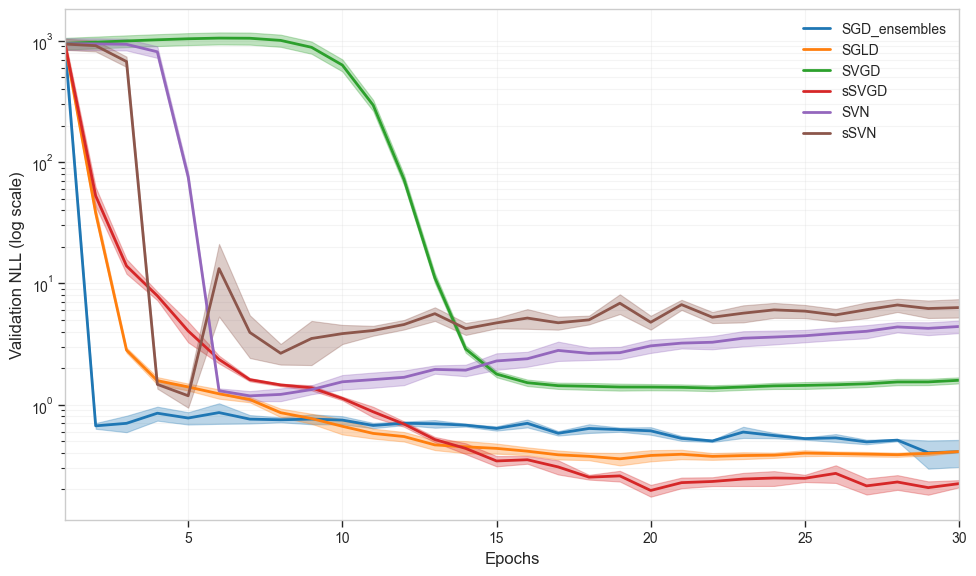

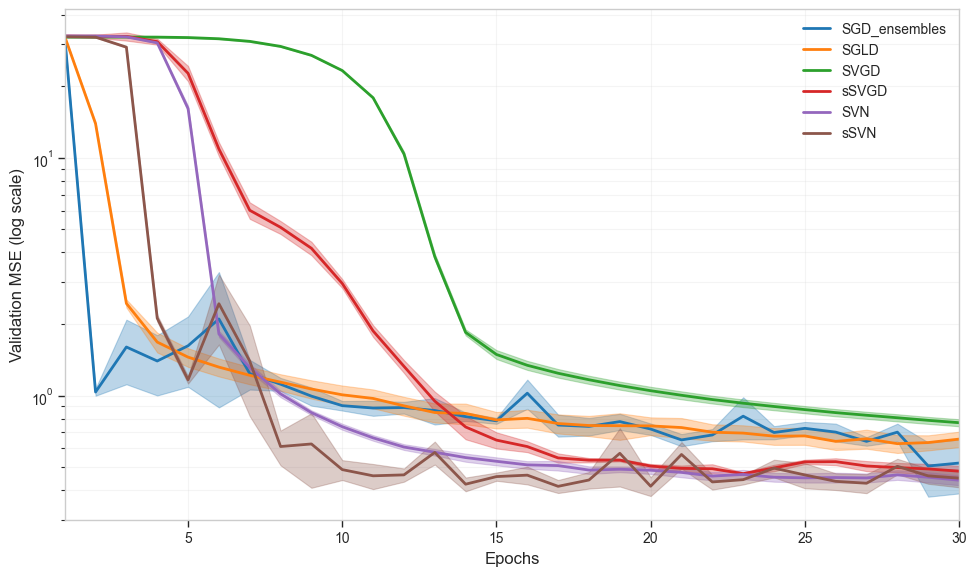

In [45]:
create_plot(results, 'val_NLL', log_scale=True)
create_plot(results, 'val_MSE', log_scale=True)